# Seabreeze Test with Python

Installed Python-Seabreeze Wrapper as follows:

* need python, pip
* sudo apt-get install build-essential python-numpy libusb-0.1-4 libusb-dev
* sudo -H pip install pyusb
* sudo -H pip install cython
* git clone https://github.com/ap--/python-seabreeze.git
* cd depository -> misc folder
* ./install_libseabreeze.sh
* ./install_udev_rules.sh
* sudo -H pip install .
* sudo udevadm trigger

That should do it...

In [1]:
# We might need to go with the pyseabreeze backend
import seabreeze
seabreeze.use('pyseabreeze')

In [2]:
# Python interface
import seabreeze.spectrometers as sb

In [3]:
# to plot
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Test USB
import usb.core
usb.core.find()

<DEVICE ID 1bcf:2b8a on Bus 001 Address 004>

In [5]:
# load list of spectrometers
devices = sb.list_devices()

In [6]:
# print list
print devices

[<SeaBreezeDevice NIRQUEST256:NQ21A0097>, <SeaBreezeDevice USB2000PLUS:FLMN01442>, <SeaBreezeDevice QEPRO:QEP00952>, <SeaBreezeDevice USB2000PLUS:FLMS00750>]


# Tests

In [7]:
# assign first spectrometer to variable
spec0 = sb.Spectrometer(devices[0]);
spec1 = sb.Spectrometer(devices[1]);
spec2 = sb.Spectrometer(devices[2]);
spec3 = sb.Spectrometer(devices[3]);



In [182]:
I_a=spec1.intensities(); I_a # air

array([ 1547.,  1537.,  1537., ...,  1535.,  1536.,  1535.])

In [103]:
I_o=spec1.intensities(); I_o # water

array([ 1551.,  1539.,  1539., ...,  1533.,  1536.,  1534.])

In [104]:
I_t=spec1.intensities(); I_t # canola

array([ 1546.,  1542.,  1538., ...,  1536.,  1532.,  1538.])

In [105]:
I_v=spec1.intensities(); I_v # beer

array([ 1549.,  1542.,  1540., ...,  1539.,  1536.,  1534.])

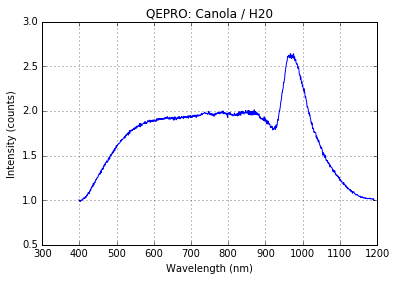

In [83]:
# a simple plot
#plt.plot(spec.wavelengths(), spec.intensities())
plt.plot(spec1.wavelengths(),I_t/I_o)
#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.title('QEPRO: Canola / H20')
plt.grid(True)
plt.show()

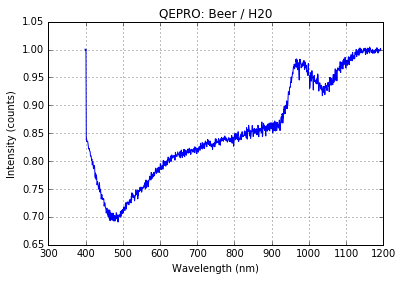

In [85]:
# a simple plot
#plt.plot(spec.wavelengths(), spec.intensities())
plt.plot(spec1.wavelengths(),I_v/I_o)
#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.title('QEPRO: Beer / H20')
plt.grid(True)
plt.show()

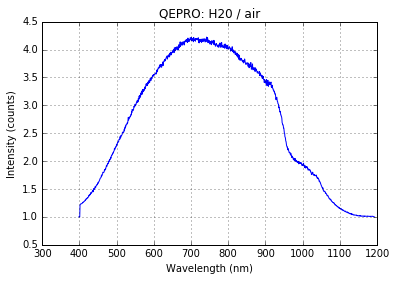

In [87]:
# a simple plot
#plt.plot(spec.wavelengths(), spec.intensities())
plt.plot(spec1.wavelengths(),I_o/I_a)
#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.title('QEPRO: H20 / air')
plt.grid(True)
plt.show()

# Calibration

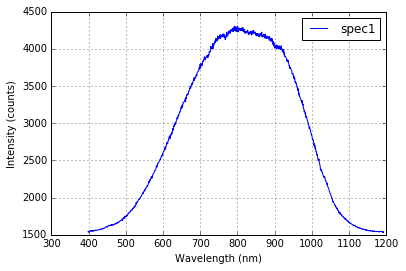

In [206]:
x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()

#plt.plot(x0,y0,label='spec0')
plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')


#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
#plt.xlim(400,900)
#plt.ylim(0,10000)
plt.show()

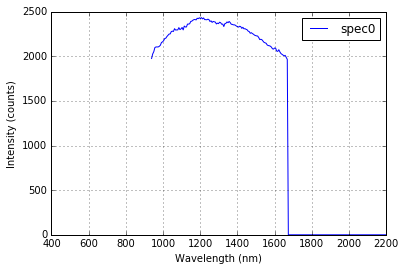

In [214]:
x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()

plt.plot(x0,y0,label='spec0')
#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')


#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(400,2200)
#plt.ylim(0,10000)
plt.show()

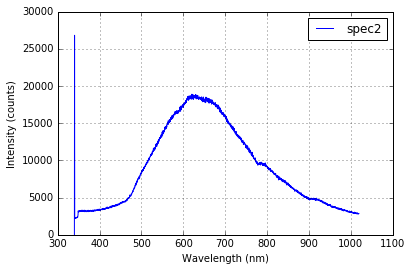

In [34]:
x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()
x3=spec3.wavelengths()
y3=spec3.intensities()


#plt.plot(x0,y0,label='spec0')
#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')
plt.plot(x3,y3,label='spec2')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
#plt.xlim(900,2100)
#plt.ylim(0,10000)
plt.show()

In [21]:
nir_source_x=x0;
nir_source_y=y0

In [27]:
flame_nir_source_x=x1;
flame_nir_source_y=y1;

In [30]:
qepro_source_x=x2;
qepro_source_y=y2

In [35]:
flame_s_source_x=x3;
flame_s_source_y=y3

In [41]:
reference=[nir_source_y,flame_nir_source_y,qepro_source_y,flame_s_source_y];

4

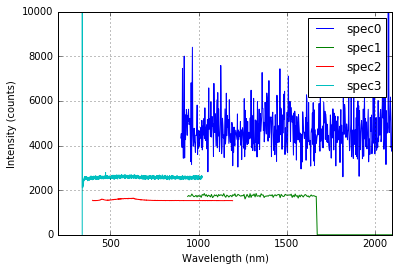

In [44]:
x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()
x3=spec3.wavelengths()
y3=spec3.intensities()

titer_plate=[y0,y1,y2,y3]

plt.plot(x0,y0,label='spec0')
plt.plot(x1,y1,label='spec1')
plt.plot(x2,y2,label='spec2')
plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2100)
plt.ylim(0,10000)
plt.show()

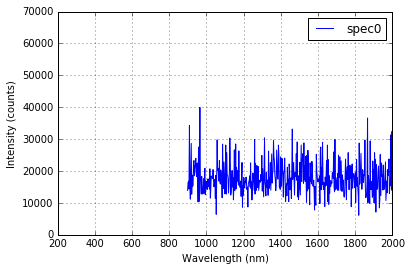

In [78]:
spec0.integration_time_micros(1000000)

y0=spec0.intensities()
x0=spec0.wavelengths()
  
#plt.plot(x0,y0,label='spec0')
plt.plot(x0,y0,label='spec0')

#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')
#plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,4000)
plt.show()

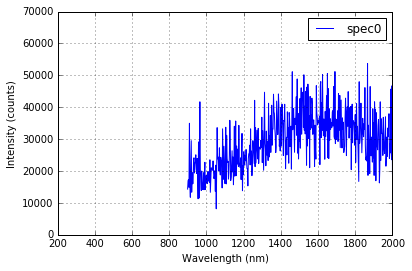

In [91]:
spec0.integration_time_micros(3000000)

y0=spec0.intensities()
x0=spec0.wavelengths()
  
#plt.plot(x0,y0,label='spec0')
plt.plot(x0,y0,label='spec0')

#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')
#plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,4000)
plt.show()

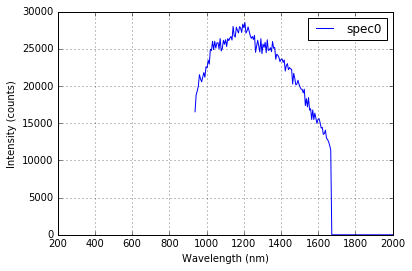

In [89]:
spec1.integration_time_micros(1000000)

y1=spec1.intensities()
x1=spec1.wavelengths()
  
plt.plot(x1,y1,label='spec0')


#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,4000)
plt.show()

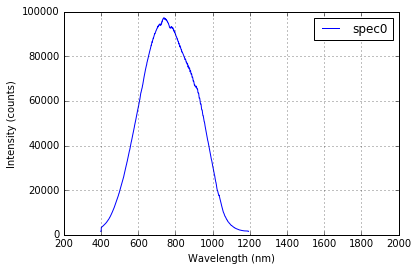

In [98]:
spec2.integration_time_micros(100000)

y2=spec2.intensities()
x2=spec2.wavelengths()
  
#plt.plot(x0,y0,label='spec0')
plt.plot(x2,y2,label='spec0')

#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')
#plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,4000)
plt.show()

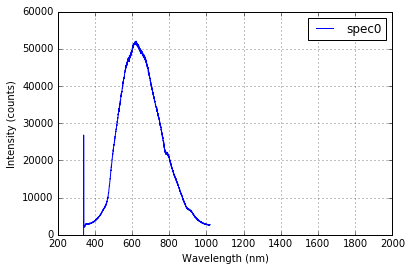

In [99]:
spec3.integration_time_micros(100000)

y3=spec3.intensities()
x3=spec3.wavelengths()
  
#plt.plot(x0,y0,label='spec0')
plt.plot(x3,y3,label='spec0')

#plt.plot(x1,y1,label='spec1')
#plt.plot(x2,y2,label='spec2')
#plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,4000)
plt.show()

In [15]:
spec0.integration_time_micros(5000000)
spec1.integration_time_micros(1000000)
spec2.integration_time_micros(80000)
spec3.integration_time_micros(100000)

x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()
x3=spec3.wavelengths()
y3=spec3.intensities()
  


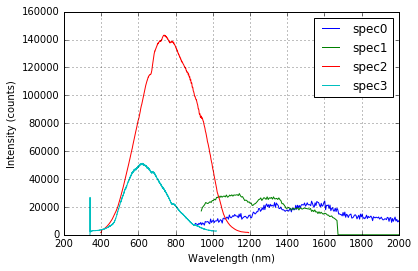

In [47]:
spec0.integration_time_micros(600000)
spec1.integration_time_micros(1000000)
spec2.integration_time_micros(80000)
spec3.integration_time_micros(100000)

x0=spec0.wavelengths()
y0=spec0.intensities()
x1=spec1.wavelengths()
y1=spec1.intensities()
x2=spec2.wavelengths()
y2=spec2.intensities()
x3=spec3.wavelengths()
y3=spec3.intensities()

collected=[y0,y1,y2,y3]

filebase='BARRIO_OO'

np.savetxt(filebase+'_0.csv',np.c_[x0,collected[0]], delimiter=',');
np.savetxt(filebase+'_1.csv',np.c_[x1,collected[1]], delimiter=',');
np.savetxt(filebase+'_2.csv',np.c_[x2,collected[2]], delimiter=',');
np.savetxt(filebase+'_3.csv',np.c_[x3,collected[3]], delimiter=',');


plt.plot(x0,y0,label='spec0')
plt.plot(x1,y1,label='spec1')
plt.plot(x2,y2,label='spec2')
plt.plot(x3,y3,label='spec3')

#plt.plot(spec2.wavelengths(), spec2.intensities())

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
#plt.title('QEPRO')
plt.grid(True)
plt.legend()
plt.xlim(200,2000)
#plt.ylim(0,100000)
plt.show()

In [49]:
from numpy import genfromtxt


In [51]:
!cd exp1

In [54]:
dark_2 = genfromtxt('dark_2.csv', delimiter=',')

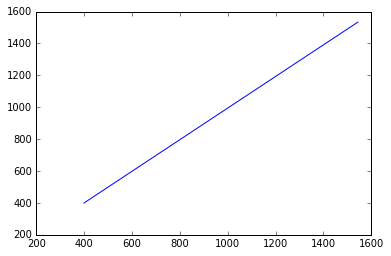

In [56]:
plt.plot(dark_2[0],dark_2[1])
plt.show()

array([[  398.49414062,  1544.        ],
       [  399.29705439,  1534.        ],
       [  400.09988946,  1531.        ],
       ..., 
       [ 1191.72064088,  1533.        ],
       [ 1192.44161862,  1533.        ],
       [ 1193.16251765,  1531.        ]])

In [64]:
dark_2[0][1]

1544.0

In [60]:
filebase_list=['BARRIO_OO','UC_DAVIS_EVOO','WF_GREEK','365_EVOO','spain','spain_argentina','canola']

In [72]:
import pandas as pd

In [110]:
filebase='dark'

dark=[]
reference=[]
dark.append(filebase)
reference.append(filebase)
 
for i in range(0,4):
    filebase='dark'
    filename=filebase+'_'+str(i)+'.csv'
    dark.append(pd.read_csv(filename,names=['x','y']))
    filebase='reference'
    filename=filebase+'_'+str(i)+'.csv'
    reference.append(pd.read_csv(filename,names=['x','y']))

In [112]:
dark[1]

,x,y
0,897.041059,5617.315979
1,901.859500,5613.078894
2,906.677253,6825.944592
3,911.494315,6291.012559
4,916.310687,6036.787435
5,921.126367,5642.738492
6,925.941354,6547.356226
7,930.755646,5731.717285
8,935.569243,6904.330672
9,940.382143,5083.443218


In [85]:
datalist=[]

for filebase in filebase_list:
    spectra=[]
    spectra.append(filebase)
    for i in range(0,4):
        filename=filebase+'_'+str(i)+'.csv'
        spectra.append(pd.read_csv(filename,names=['x','y']))
    datalist.append(spectra)

In [97]:
spec_list=['NIRQUEST','FLAME_N','QEPRO','FLAME_S']

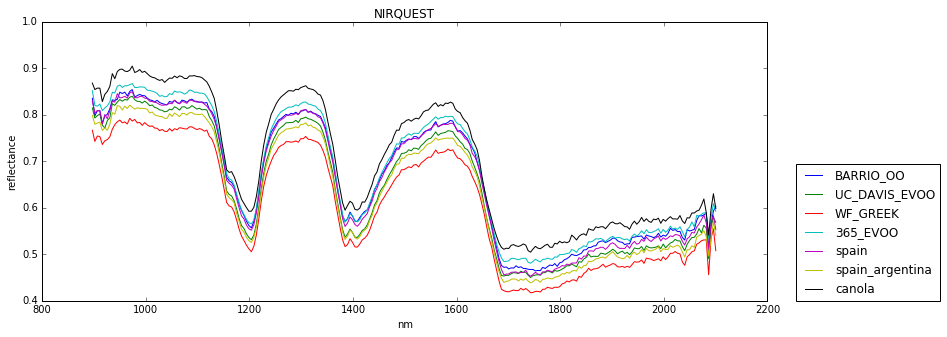

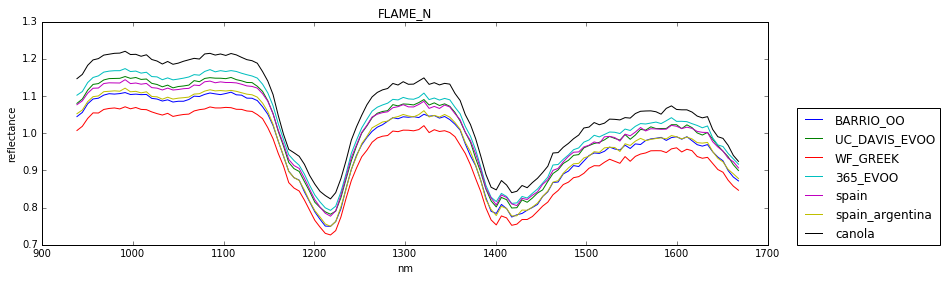

In [171]:
for i in range(0,2):
    spec=spec_list[i]
    for spectrum in datalist:
        analyte=spectrum[0]
        sample_y=spectrum[i+1].y
        ref_y=reference[i+1].y
        dark_y=dark[i+1].y
        wave=(sample_y-dark_y)/(ref_y-dark_y)
        x=reference[i+1].x
        plt.plot(x,wave,label=analyte)
    plt.rcParams["figure.figsize"] = (13,4)

    plt.legend()
    plt.legend(loc=(1.04,0))
    plt.title(spec)
    plt.xlabel('nm')
    plt.ylabel('reflectance')
    plt.show()
    outfile=spec+".svg"
    plt.savefig(outfile)
    outfile=spec+".png"
    plt.savefig(outfile)

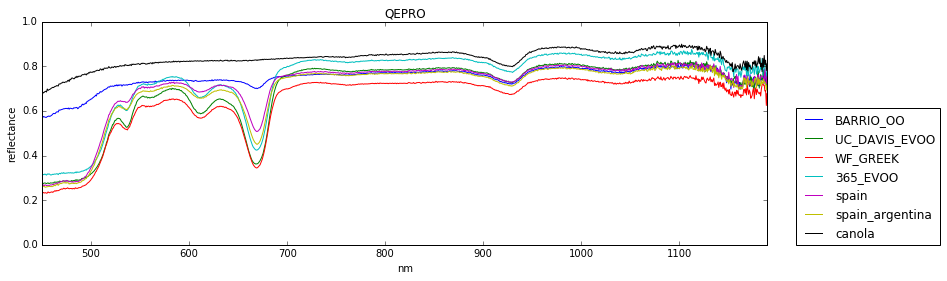

In [173]:
i=2
spec=spec_list[i]
for spectrum in datalist:
    analyte=spectrum[0]
    sample_y=spectrum[i+1].y
    ref_y=reference[i+1].y
    dark_y=dark[i+1].y
    wave=(sample_y-dark_y)/(ref_y-dark_y)
    x=reference[i+1].x
    plt.plot(x,wave,label=analyte)
plt.rcParams["figure.figsize"] = (14,5)
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.legend()

plt.legend(loc=(1.04,0))
plt.title(spec)
plt.xlim(450,1190)
plt.ylim(0,1)
plt.show()
outfile=spec+".svg"
plt.savefig(outfile)
outfile=spec+".png"
plt.savefig(outfile)

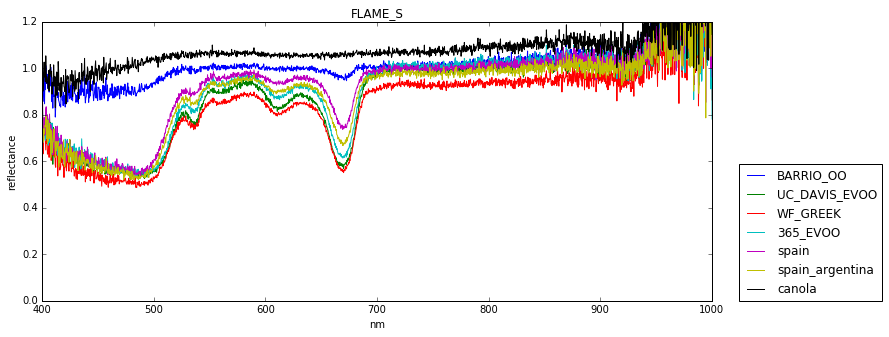

In [178]:
i=3
spec=spec_list[i]
#plt.figure(figsize=(40,40))
plt.rcParams["figure.figsize"] = (13,5)

for spectrum in datalist:
    analyte=spectrum[0]
    sample_y=spectrum[i+1].y
    ref_y=reference[i+1].y
    dark_y=dark[i+1].y
    wave=(sample_y-dark_y)/(ref_y-dark_y)
    x=reference[i+1].x
    plt.plot(x,wave,label=analyte)
plt.legend(loc=4)
plt.legend(loc=(1.04,0))
plt.xlabel('nm')
plt.ylabel('reflectance')
plt.title(spec)
plt.xlim(400,1000)
plt.ylim(0,1.2)
plt.show()
outfile=spec+".svg"
plt.savefig(outfile)
outfile=spec+".png"
plt.savefig(outfile)

In [179]:
!pwd

/home/dwblair/Downloads
